In [55]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
import numpy as np


In [23]:
data = pd.read_csv('out_40_corrected.csv', sep = ';', encoding ='mac_cyrillic')

In [24]:
data

,student,song,coarse_genre,genre1,genre2,genre3,zero_crossing_rate,spectral_centroid,spectral_rolloff,mfcc,...,chroma_frequencies_3,chroma_frequencies_4,chroma_frequencies_5,chroma_frequencies_6,chroma_frequencies_7,chroma_frequencies_8,chroma_frequencies_9,chroma_frequencies_10,chroma_frequencies_11,chroma_frequencies_12
0,Евдокимова_Анастасия,Passacalia-Hendel,classic,instrumental,NaN,NaN,0.045798,748.314035,1269.271721,-11.941515,...,0.150021,0.153033,0.167364,0.191547,0.205490,0.187953,0.168512,0.154818,0.146623,0.138912
1,Журбенко Петр,Johannes_Passion—Johann_Sebastian_Bach,classic,aria,NaN,NaN,0.076417,1414.632434,2666.842841,-10.983263,...,0.319919,0.327633,0.360628,0.388893,0.381388,0.385996,0.293817,0.420031,0.248379,0.282112
2,Иванова Евгения,Канон_Для_Струнного_Оркестра-Иоганн_Пахельбель,classic,NaN,NaN,NaN,0.085291,1490.988501,2839.114715,-5.051047,...,0.216023,0.297068,0.252765,0.303570,0.315133,0.249486,0.221325,0.201776,0.195795,0.202072
3,Людмила_Проценко,A_Simple_Life-Brian_Crain,classic,neo-classical,new_age_piano,NaN,0.042886,656.653479,1070.636358,-2.400885,...,0.347152,0.267500,0.206898,0.222848,0.253309,0.282360,0.310962,0.263674,0.224395,0.235438
4,Никанорова Даша,Adagio_in_G_Minor-Albinoni,classic,instrumental,NaN,NaN,0.102339,1768.348182,3328.242111,-7.314991,...,0.392298,0.412282,0.485981,0.478761,0.525003,0.381633,0.471162,0.381619,0.338369,0.341242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,Шемякина Аня,The_Struts_-_Primadonna_Like_Me,rock,alternative_rock,glam_rock,NaN,0.153660,3041.577527,6378.389715,9.809298,...,0.503473,0.499696,0.385848,0.354051,0.368450,0.351270,0.441679,0.446410,0.542506,0.320269
320,Aleksei Zverev,Попрыгун_и_Гвозди-На_Убере,rock,indie,alternative_pop,NaN,0.086736,2103.759219,4411.500950,3.254812,...,0.321782,0.289839,0.286502,0.307791,0.315518,0.292220,0.267222,0.281542,0.275587,0.270769
321,Aleksei Zverev,Попрыгун_и_Гвозди-Рыбки,rock,indie,alternative_pop,NaN,0.084793,2049.282500,4381.956846,3.578090,...,0.460827,0.466181,0.423808,0.267113,0.187591,0.210219,0.308529,0.347520,0.287365,0.459892
322,Aleksei Zverev,Попрыгун_и_Гвозди-Черёмуха,rock,indie,alternative_pop,NaN,0.071818,2010.463465,4376.270481,5.899025,...,0.355812,0.447199,0.318935,0.252392,0.371693,0.407885,0.296010,0.305457,0.496221,0.452474


In [26]:
Counter(data.coarse_genre)

Counter({'classic': 8,
         'electronic': 79,
         'pop': 42,
         'hip-hop': 26,
         'indie': 27,
         'instrumental': 9,
         'jazz': 5,
         'metal': 53,
         'rock': 75})

In [27]:
data.dtypes

student                   object
song                      object
coarse_genre              object
genre1                    object
genre2                    object
genre3                    object
zero_crossing_rate       float64
spectral_centroid        float64
spectral_rolloff         float64
mfcc                     float64
tonal_centroid           float64
beats_per_minute         float64
spectral_bandwidth       float64
chroma_frequencies_1     float64
chroma_frequencies_2     float64
chroma_frequencies_3     float64
chroma_frequencies_4     float64
chroma_frequencies_5     float64
chroma_frequencies_6     float64
chroma_frequencies_7     float64
chroma_frequencies_8     float64
chroma_frequencies_9     float64
chroma_frequencies_10    float64
chroma_frequencies_11    float64
chroma_frequencies_12    float64
dtype: object

Посмотрим на данные, как они распределяются по жанрам в зависимости от других параметров. Сделаем PCA:

In [29]:
from sklearn.preprocessing import StandardScaler
features = ['zero_crossing_rate', 'spectral_centroid', 'spectral_rolloff', 'mfcc', 'tonal_centroid', 'beats_per_minute', 'spectral_bandwidth']
x = data.loc[:, features].values
y = data.loc[:,['coarse_genre']].values
x = StandardScaler().fit_transform(x)

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [32]:
finalDf = pd.concat([principalDf, data[['coarse_genre']]], axis = 1)

In [33]:
finalDf

,principal component 1,principal component 2,coarse_genre
0,5.505209,0.932954,classic
1,3.042858,-0.061805,classic
2,2.475408,-0.052738,classic
3,4.794859,2.512119,classic
4,1.890738,1.302130,classic
...,...,...,...
319,-3.115195,0.123137,rock
320,0.155292,1.150792,rock
321,0.127285,1.400612,rock
322,0.233798,0.523142,rock


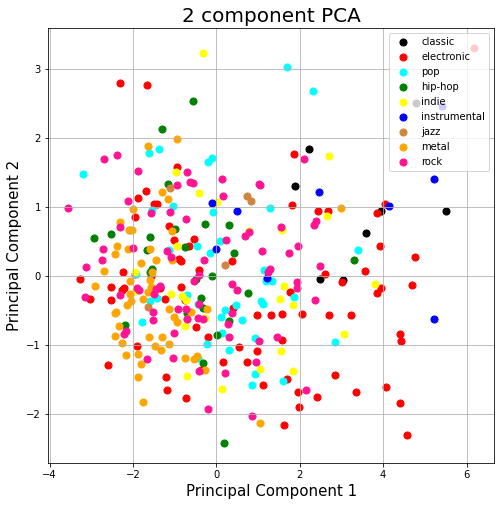

In [47]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

ax.set_title('2 component PCA', fontsize = 20)
targets = ['classic', 'electronic', 'pop', 'hip-hop', 'indie', 'instrumental', 'jazz', 'metal', 'rock']
colors = ['black', 'red', 'aqua', 'green', 'yellow', 'blue', 'peru', 'orange', 'deeppink']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['coarse_genre'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Попробуем K-means: 

In [53]:
X = data.loc[:, features].values

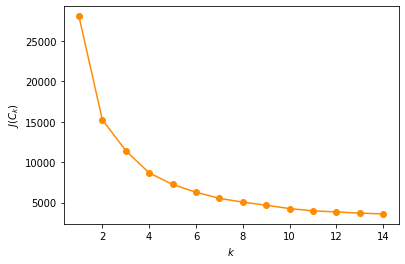

In [57]:
distortions = []
for i in range(1, 15):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0)
    km.fit(X)
    distortions.append(np.sqrt(km.inertia_))


plt.plot(range(1, 15), distortions, marker='o', color='darkorange')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.show()

У нас кластеров должно получаться около 9, но данные не позволяют разбить музыку правильно, график K-means показывает, что оптимальное число кластеров на наших данных - 2

In [58]:
km_2 = KMeans(n_clusters=2, init='random',n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km_2 = km_2.fit_predict(X)

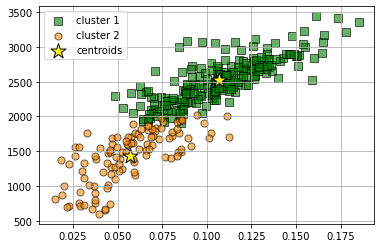

In [59]:
plt.scatter(
    X[y_km_2 == 0, 0], X[y_km_2 == 0, 1],
    s=50, c='green',
    marker='s', edgecolor='black', alpha=0.6,
    label='cluster 1'
)

plt.scatter(
    X[y_km_2 == 1, 0], X[y_km_2 == 1, 1],
    s=50, c='darkorange',
    marker='o', edgecolor='black', alpha=0.6,
    label='cluster 2'
)



plt.scatter(
    km_2.cluster_centers_[:, 0], km_2.cluster_centers_[:, 1],
    s=250, marker='*',
    c='yellow', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [61]:
km_9 = KMeans(n_clusters=9, init='random',n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km_9 = km_9.fit_predict(X)

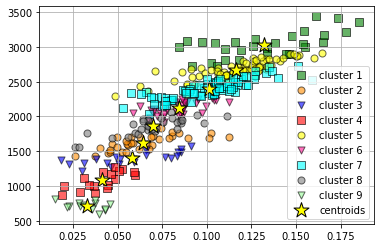

In [62]:
plt.scatter(
    X[y_km_9 == 0, 0], X[y_km_9 == 0, 1],
    s=50, c='green',
    marker='s', edgecolor='black', alpha=0.6,
    label='cluster 1'
)

plt.scatter(
    X[y_km_9 == 1, 0], X[y_km_9 == 1, 1],
    s=50, c='darkorange',
    marker='o', edgecolor='black', alpha=0.6,
    label='cluster 2'
)

plt.scatter(
    X[y_km_9 == 2, 0], X[y_km_9 == 2, 1],
    s=50, c='blue',
    marker='v', edgecolor='black', alpha=0.6,
    label='cluster 3'
)



plt.scatter(
    X[y_km_9 == 3, 0], X[y_km_9 == 3, 1],
    s=50, c='red',
    marker='s', edgecolor='black', alpha=0.6,
    label='cluster 4'
)

plt.scatter(
    X[y_km_9 == 4, 0], X[y_km_9 == 4, 1],
    s=50, c='yellow',
    marker='o', edgecolor='black', alpha=0.6,
    label='cluster 5'
)

plt.scatter(
    X[y_km_9 == 5, 0], X[y_km_9 == 5, 1],
    s=50, c='deeppink',
    marker='v', edgecolor='black', alpha=0.6,
    label='cluster 6'
)

plt.scatter(
    X[y_km_9 == 6, 0], X[y_km_9 == 6, 1],
    s=50, c='aqua',
    marker='s', edgecolor='black', alpha=0.6,
    label='cluster 7'
)

plt.scatter(
    X[y_km_9 == 7, 0], X[y_km_9 == 7, 1],
    s=50, c='grey',
    marker='o', edgecolor='black', alpha=0.6,
    label='cluster 8'
)

plt.scatter(
    X[y_km_9 == 8, 0], X[y_km_9 == 8, 1],
    s=50, c='palegreen',
    marker='v', edgecolor='black', alpha=0.6,
    label='cluster 9'
)



# plot the centroids
plt.scatter(
    km_9.cluster_centers_[:, 0], km_9.cluster_centers_[:, 1],
    s=250, marker='*',
    c='yellow', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()